## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x,y = mnist['data'],mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x[3601]
some_digit_image = some_digit.reshape(28,28)

#reshaping it to plot it.

(-0.5, 27.5, 27.5, -0.5)

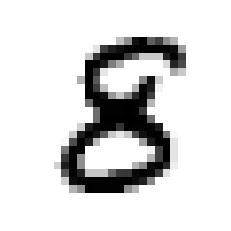

In [9]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [10]:
y[3601]

'8'

In [11]:
x_train, x_test = x[:6000], x[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

In [12]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 Detector

In [13]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [14]:
y_train

array([2, 6, 1, ..., 3, 4, 7], dtype=int8)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(tol = 0.1, solver = 'lbfgs')
clf.fit(x_train, y_train_2)

c:\users\little\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [17]:
clf.predict([some_digit])

array([False])

In [18]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

c:\users\little\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\little\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [19]:
a.mean()

0.956

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

c:\users\little\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\little\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [21]:
y_train_pred

array([ True, False, False, ..., False, False, False])

 ## Calculating Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2,y_train_pred)

array([[5274,  145],
       [ 119,  462]], dtype=int64)

In [24]:
##This is confusion matrix for perfect predictions.
confusion_matrix(y_train_2,y_train_2)

array([[5419,    0],
       [   0,  581]], dtype=int64)

## Precision & Recall

In [31]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_2, y_train_pred)


0.7611202635914333

In [32]:
recall_score(y_train_2, y_train_pred)

0.7951807228915663

## F1 Score

In [33]:
from sklearn.metrics import f1_score
f1_score(y_train_2, y_train_pred)

0.7777777777777777

## Precision - Recall Curve

In [39]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")

c:\users\little\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\little\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [40]:
y_scores

array([ 15.25232892, -44.86833676, -31.67588142, ..., -19.08100305,
       -97.29361949, -74.92891943])

In [41]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [42]:
precisions

array([0.11622324, 0.11604642, 0.11606964, ..., 1.        , 1.        ,
       1.        ])

In [43]:
recalls

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [44]:
thresholds

array([-170.76152041, -170.71308245, -170.56217303, ...,  209.9846326 ,
        226.37657709,  241.97818945])

## Plotting Precision Recall Curve

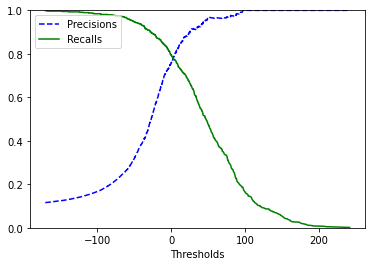

In [51]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precisions")
plt.plot(thresholds, recalls[:-1], "g-", label="Recalls")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()
